In [1]:
import numpy as np
import csv
import pandas as pd
from scipy.fftpack import dct, fft
from scipy.io import wavfile
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
import python_speech_features as features
from sklearn import mixture
import itertools
import statistics
from math import e, pi, log
import operator
import scipy.io

### Загрузка коэффициентов 

#### Matlab 

In [ ]:
import scipy.io
train_arrays = scipy.io.loadmat('./Models/train_fourty/train_MFCC.mat')
train_arrays = train_arrays['train_MFCC_norm'][0][2]

test_arrays = scipy.io.loadmat('./Models/test_fourty/test_MFCC.mat')
test_arrays = test_arrays['test_MFCC_norm'][0][2]

#### Bob 

In [3]:
train_arrays = np.load('/Users/1/Desktop/TEST/NEW/train_hundred/train.npy')
test_arrays = np.load('/Users/1/Desktop/TEST/NEW/test_hundred/test.npy')

## Base Functions 

In [2]:
def max_likelihood(X, means, cov, w):
    N, f = X.shape
    P = []
    for vector_index in range(N):
        weighted_prob = []
        for i in range(0,10):
            gaussian = (w[i])*np.exp(-0.5*np.dot(np.dot((X[vector_index]-means[i]), (np.linalg.inv(cov[i]))), 
                (np.transpose(X[vector_index]-means[i]))))/(((2*pi)**(f/2))*((np.linalg.det(cov[i]))**0.5))
            weighted_prob.append(gaussian)
        P.append(sum(weighted_prob))
    S = (1/N)*sum(log(j) for j in filter(lambda a: a!=0, P))
    return S

## Train Test Part 

### GMM Score Result 

#### NEW 1:100

19 + Energy (60) - все в нулевой класс (50/50)

19 без энергии (57) - все в нулевой класс (50/50)

17 + Energy (54) - все в нулевой класс (50/50)

16 + Energy (51) - так же как и 16 без энергии (2/50)

13 + Energy (42) - 4% ошибок (2/50)

16 без энергии (48) - 4% ошибок (2/50)

13 + Energy - 5% ошибок (5/100)

train = test = 10 sec: 41% ошибок (41/100)

In [5]:
#train
gmm_arrays = []
for i in range(0, len(train_arrays)):
    gmm = mixture.GaussianMixture(n_components = 10, max_iter=150).fit(train_arrays[i])
    gmm_arrays.append([gmm.means_])
    gmm_arrays[-1].append(gmm.covariances_)
    gmm_arrays[-1].append(gmm.weights_)

In [11]:
#test
d = []
predict = 0

for speaker in range(0, len(test_arrays)):
    print(speaker)
    p = []
    
    for i in range(0, len(train_arrays)):
        p.append(max_likelihood(test_arrays[speaker], gmm_arrays[i][0], gmm_arrays[i][1], gmm_arrays[i][2]))
    max_lklhd = p.index(max(p))
    if max_lklhd == speaker:
        predict = predict + 1
    d.append(p)
    
    print(max_lklhd)
    
print("ERR: ", predict)

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
59
9
9
10
88
11
11
12
12
13
88
14
70
15
15
16
65
17
17
18
77
19
19
20
27
21
21
22
22
23
23
24
24
25
26
26
53
27
27
28
28
29
29
30
30
31
31
32
89
33
33
34
34
35


KeyboardInterrupt: 

### UBM Results

23


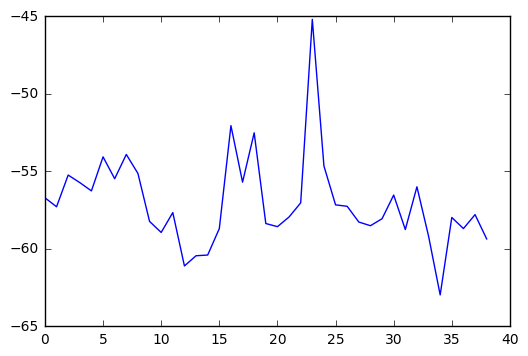

In [210]:
ubm_array = np.concatenate((MFCC_arrays[0], MFCC_arrays[1], MFCC_arrays[2], MFCC_arrays[3], MFCC_arrays[4],
                   MFCC_arrays[5], MFCC_arrays[6], MFCC_arrays[7], MFCC_arrays[8], MFCC_arrays[9],
                   MFCC_arrays[10], MFCC_arrays[11], MFCC_arrays[12], MFCC_arrays[13], MFCC_arrays[14],
                   MFCC_arrays[15], MFCC_arrays[16], MFCC_arrays[17], MFCC_arrays[18], MFCC_arrays[19],
                   MFCC_arrays[20], MFCC_arrays[21], MFCC_arrays[22], MFCC_arrays[23], MFCC_arrays[24],
                   MFCC_arrays[25], MFCC_arrays[26], MFCC_arrays[27], MFCC_arrays[28]), axis = 0)

gmm_ubm = mixture.GaussianMixture(n_components = 10).fit(ubm_array)
all_ubm_likelihood = [max_likelihood(MFCC_arrays[i], gmm_ubm.means_, gmm_ubm.covariances_, gmm_ubm.weights_) for i in range(0,len(MFCC_arrays))]
print(all_ubm_likelihood.index(max(all_ubm_likelihood)))
plt.plot(all_ubm_likelihood)